In [1]:
from scipy.interpolate import spline
from scipy.interpolate import interp1d as Uspline

from matplotlib.mlab import PCA
import tsne
import random

import numpy as np
from scipy.special import betaln
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import misc

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import sys

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 #300
%reload_ext autoreload

In [3]:
def randomize(Mi,sample, Rmut, Psize, mutation_numbers):
    
    #select random integers to pull from sample, from which to populate Mi
    #we need Psize random integers between size 0 and len(sample)
    populate_Mi = np.random.randint(len(sample), size=[len(Mi)])
    Mi = sample[populate_Mi]
    
    INDEXES_samplei = np.repeat(np.array(range(len(mutation_numbers))), mutation_numbers)
    INDEXES_positioni = np.random.randint(Psize,size=[len(INDEXES_samplei)])
    
    #invert (mutate) all positions selected
    Mi[INDEXES_samplei, INDEXES_positioni] = np.logical_not(Mi[INDEXES_samplei, INDEXES_positioni])
    
    return Mi

    
def evolve_forward(Nbottle=1, Ngen=5, Npop=int(1E5), Rmut=1, Psize=int(1E4)):
    #Nbottle=number of items to propogate to next round of evolution
    #Ngen=number of generations of mutation to go through
    #Npop=size of population to set at
    #Rmut=rate of mutations, expected value per sequence; actually values draw from exponential distribution
    #Psize=length of 'protein' in bits
    
    M = np.ones([Ngen+1, Npop, Psize], dtype='bool') #initialize population #dtype='b' 
    
    for i in range(1,Ngen+1):
        
        #select Nbottle representatives from the population
        sample_indexes = np.random.randint(Npop,size=[Nbottle])
        
        sample = M[i-1,sample_indexes]
        
        #create random sample
        mutation_numbers = np.random.poisson(lam=Rmut,size=Npop)
        
        #generate a new population from the previous sample
        #overwrite the population that currently occupies that position
        M[i] = randomize(M[i], sample, Rmut, Psize, mutation_numbers)
        
    M = np.reshape(M[1:], [Ngen*Npop, Psize])
    M = M.astype('int')
    #M[M==0]=-1
    return M
 
    
def radial_plot(PCA_M, N=3, Npop=2, ONEcolor='black', TWOcolor='red'):
    #
    #PCA_M is a PCA matrix
    #N is number of components to plot
    #Npop is the number of distinct populations embedded in PCA_M (can be 1 or 2)
    #color of the first PCA value
    
    xN=np.shape(PCA_M)[0]
    
    theta=np.arange(0,np.pi,np.pi/N)
    thetaspread=np.arange(0,np.pi/N,np.pi/N/xN*2)
    
    #print(len(theta), len(thetaspread), xN, len(PCA_M[xN/2:,1]))
    
    ax = plt.subplot(111, projection='polar')
    #ax.set_ylim([-10,10])
    #ax = plt.subplot(111)
    
    for i in range(N): #,4,6,8,10,12,14,16,18]:
        #ax.scatter(results.Y[xN/2:,i]*np.cos(theta[i]+thetaspread), results.Y[xN/2:,i]*np.sin(theta[i]+thetaspread),s=.05, color='black')
        ax.scatter(theta[i]-thetaspread+(PCA_M[xN/2:,i]<0)*np.pi, np.abs(PCA_M[xN/2:,i]),s=.05, color=ONEcolor)
    
    if Npop==2:
        for i in range(N): #,4,6,8,10,12,14,16,18]:    
            #ax.scatter(results.Y[:xN/2,i]*np.cos(theta[i]+thetaspread), results.Y[:xN/2,i]*np.sin(theta[i]+thetaspread),s=.05, color='red')
            ax.scatter(theta[i]-thetaspread+(PCA_M[:xN/2,i]<0)*np.pi, np.abs(PCA_M[:xN/2,i]),s=.05, color=TWOcolor)

    else: pass
    #ax.scatter([0,0,0], [4,-9,-4])
    #ax.set_rmax(40)
    #ax.set_rticks([20,40])  # less radial ticks
    #ax.set_rlabel_position(-22.5)
    ax.set_xticks(np.arange(0,2*np.pi,np.pi/N))
    
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    return ax

def PCA_overlay(PCA_M, N=10, Npop=2, ONEcolor='black', TWOcolor='red'):
    #the goal for this function is just to plot the PCA overlay... sometimes easier for visualizing where things
    #are moving too on the plots... 
    
    for i in [0,2,4,6,8,10,12,14]:
        plt.scatter(results.Y[8000:,i],results.Y[8000:,i+1], color='black',s=.05)
        plt.scatter(results.Y[:8000,i],results.Y[:8000,i+1], color='red',s=.05 )

#####COMPLETE FUNCTION
def VolumeRandom(Wt, M):
    
    ###complete this function, for volume of a shape!!!!
    z=np.random.randint(2,size=[Npoints,np.shape[Wt]])
    
    return


    z =np.random.randint(2,size=[40000,i])
    zN=z.dot(results.Wt)+np.zeros(i).dot(results.Wt)


def ManningD(x1, M):
    #computes manning distance btween x1 and all entries in the matrix x
    
    diff = np.abs(M-x1)
    
    return np.sum(diff, axis=1)


        
def Volume(M, N=0, verbose=False):
    xN = np.shape(M)[1]
    
    #take the maximum values at each component
    if N > 1: x=np.max(M[:N],axis=0)-np.min(M,axis=0)
    else: x=np.max(M,axis=0)-np.min(M,axis=0)
    
    #gate x so that only values greater than 1 can contribute
    x = x[:30]
    V = np.sum(x)
    
    #PROPER VOLUME FORMULA
    #V = np.sum(np.log(x))
    
    if verbose: print('volume is: ' + str(V))
    #compute an effective volume element
    
    
    #I am running out of ideas for a good measure of effective volume transitted. 
    #part of the problem is that as the number of dimensions increases the spatial diversity doesn't really increase
    #I think the result of this is that the 'volume' computation where we overestimate by....
    
    
    
    return V


The below are basic executions of our code - evolve a population and plot it.

I have been working on trying to determine a reliable metrix for measuring the 'hypervolume' of the PCA space we are working in... among the thoughts I have had is to try and take maximal elements along each component, find the difference, and multiply these together to form a sort of hypervolume measure - should allow us to measure XXX

In [80]:
M1 = evolve_forward(Nbottle=4, Ngen=8, Npop=2000, Rmut=2, Psize=400)
M2 = evolve_forward(Nbottle=200,     Ngen=8, Npop=2000, Rmut=2, Psize=400)
M = np.reshape([M1,M2],[np.shape(M1)[0]*2, np.shape(M1)[1]])
print(np.shape(M))

#M[M==0]=

STD=False
results = PCA(M, standardize=STD)
#results1= PCA(M1, standardize=STD)
#results2= PCA(M2, standardize=STD)


(32000, 400)


In [65]:
#radial_plot(results2.Y,N=6, Npop=1)
#radial_plot(results1.Y,N=6, Npop=1, ONEcolor='red')
#radial_plot(results.Y,N=6)

M1 = evolve_forward(Nbottle=4, Ngen=8, Npop=2000, Rmut=2, Psize=400)
M2 = evolve_forward(Nbottle=1000,     Ngen=8, Npop=2000, Rmut=2, Psize=400)
M = np.reshape([M1,M2],[np.shape(M1)[0]*2, np.shape(M1)[1]])

In [66]:
v=ManningD(M[0], M)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


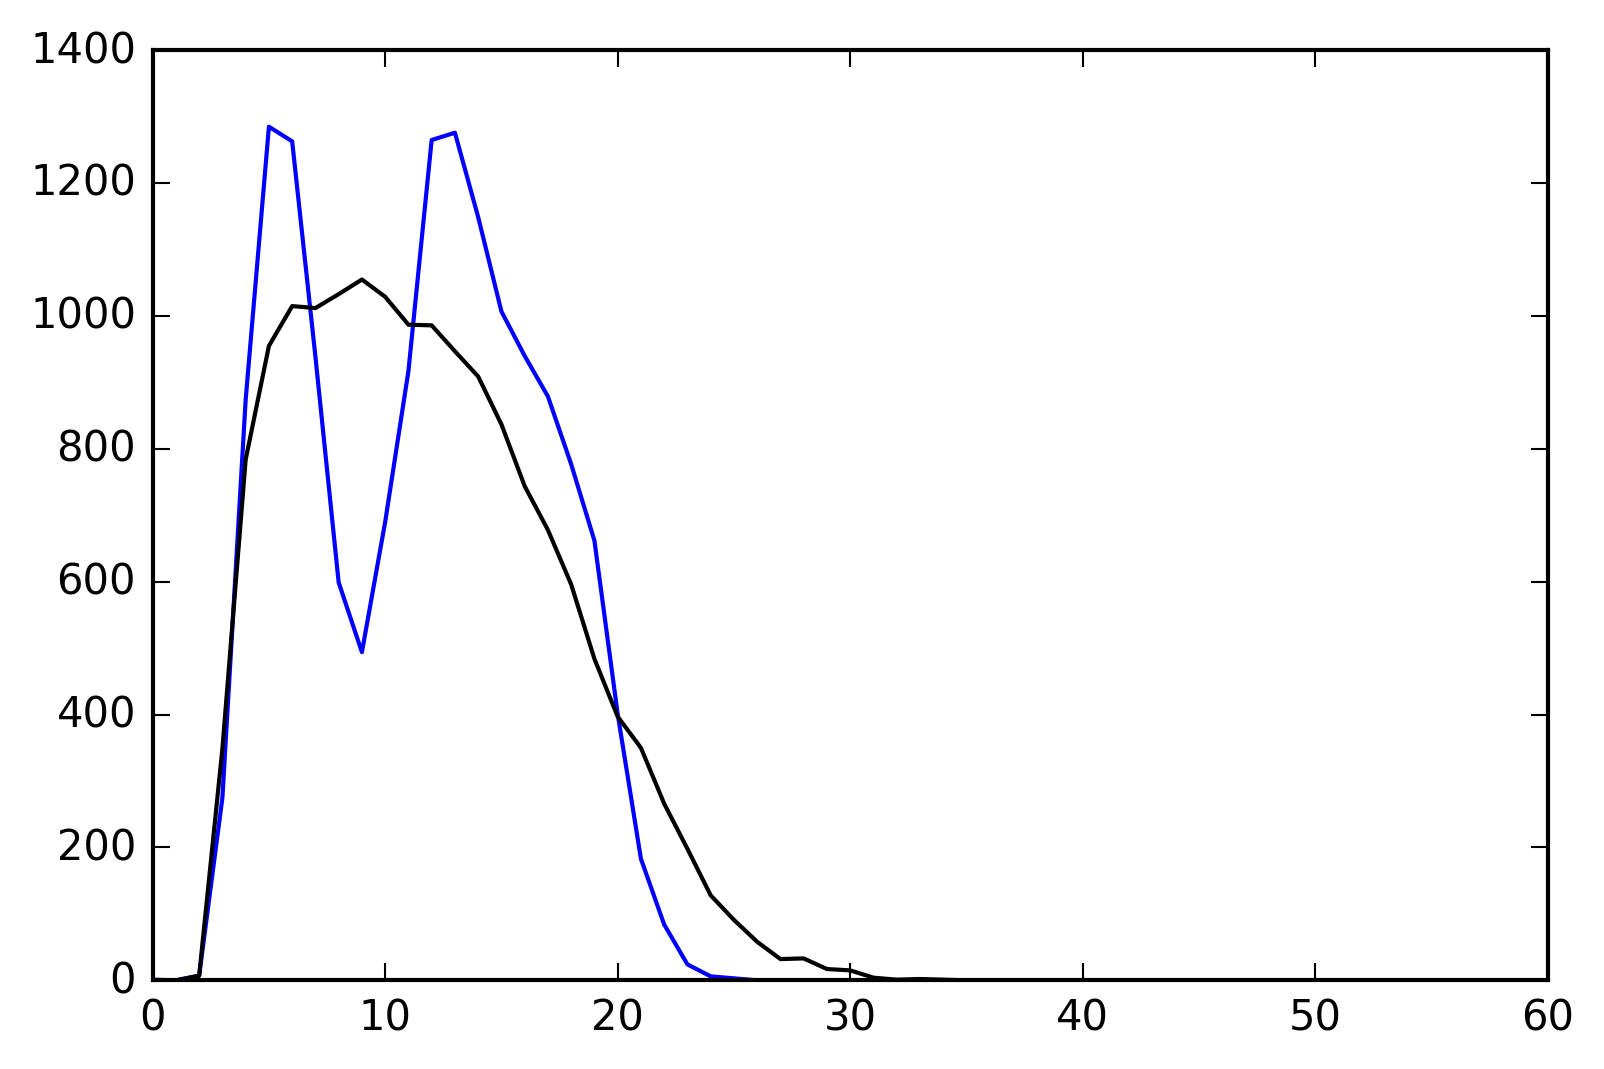

In [67]:
h1=np.histogram(v[:len(v)/2],bins=range(60))
h2=np.histogram(v[len(v)/2:],bins=range(60))
plt.plot(h1[1][:-1],h1[0], color='blue')
plt.plot(h2[1][:-1],h2[0], color='black')

In [62]:
#run both evolution scenarios

M1 = evolve_forward(Nbottle=1, Ngen=100, Npop=400, Rmut=2, Psize=8)
M2 = evolve_forward(Nbottle=400,     Ngen=100, Npop=400, Rmut=2, Psize=8)
M = np.reshape([M1,M2],[np.shape(M1)[0]*2, np.shape(M1)[1]])
print(np.shape(M))

#M[M<0]=-1
M1[M1<0]=0
M2[M2<0]=0


(80000, 8)


In [63]:
M2 = evolve_forward(Nbottle=200,     Ngen=20, Npop=500, Rmut=2, Psize=500)
results2=PCA(M2,standardize=False)

In [64]:
x1=np.random.randint(2,size=[20000,80])
results=PCA(x1, standardize=False)
print(Volume(results.Y))

x=np.random.randint(20,size=[100,80])
x[x>2]=1
results=PCA(x, standardize=False)
print(Volume(results.Y))
print(Volume(x1.dot(results.Wt)))

118.304389664
69.1288395928
115.913065574


In [65]:
z=np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
results=PCA(z,standardize=False)

In [66]:
z=np.array([[0,0,0,0,0],[0,1,0,0,0],[0,0,0,1,0],[1,1,1,1,1]])
zN=(z).dot(results.Wt)
print(z,zN)
#print(np.linalg.det(zN))

print(zN[-1].dot(zN[-1])) #length of component goes with root(N)^N
#np.max(zN,axis=0), np.max(results2.Y,axis=0)

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [1 1 1 1 1]] [[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  8.94427191e-01  -2.23606798e-01  -2.23606798e-01  -2.23606798e-01
   -2.23606798e-01]
 [  0.00000000e+00   1.24900090e-16  -8.16496581e-01   4.08248290e-01
    4.08248290e-01]
 [  1.34164079e+00  -6.42418606e-01  -3.04214649e-01   1.62763700e+00
    2.13423442e-01]]
5.0


In [218]:
np.sum(zN[500]*zN[500])

35.000000000000021

In [205]:
print(Volume(zN),Volume(results.Y), results.Wt, np.linalg.det(results.Wt.T))

77.32069563 46.9755606271 [[-0.0156024  -0.00862039  0.25139061 ...,  0.05265908 -0.00549298
  -0.05433016]
 [-0.02673949 -0.02418658  0.10912568 ..., -0.0726852   0.01081636
   0.67881152]
 [ 0.022361    0.01726251  0.45479504 ..., -0.20598035 -0.00112617
  -0.07281421]
 ..., 
 [ 0.02179017 -0.04656816 -0.09612671 ..., -0.01509441 -0.12349329
   0.14590707]
 [-0.11749999 -0.03794118  0.03510797 ...,  0.00111109  0.20479765
  -0.04448264]
 [ 0.02291201 -0.09840858  0.08279971 ..., -0.0230766  -0.00529733
   0.00547243]] -1.0


In [63]:
Nprot=300

record1=np.zeros(Nprot)
record2=np.zeros(Nprot)
totalV=np.zeros(Nprot)

for i in range(Nprot)[::8][2:]:
    M1 = evolve_forward(Nbottle=1,     Ngen=5, Npop=8000, Rmut=1, Psize=i)
    #results2= PCA(M2, standardize=False)
    #record1[i] = Volume(results2.Y, verbose=False)
    
    M2 = evolve_forward(Nbottle=500,     Ngen=5, Npop=8000, Rmut=1, Psize=i)
    #M = np.reshape([M1,M2],[np.shape(M1)[0]*2, np.shape(M1)[1]])
    #results2= PCA(M2, standardize=False)
    #record2[i] = Volume(results2.Y, verbose=False)
    
    M = np.reshape([M1,M2],[np.shape(M1)[0]*2, np.shape(M1)[1]])
    results = PCA(M, standardize=False)
    
    record1[i] = Volume(results.Y[:len(results.Y)/2])
    record2[i] = Volume(results.Y[len(results.Y)/2:])
    
    z =np.random.randint(2,size=[100000,i])
    zN=z.dot(results.Wt) #(z-results.mu).dot(results.Wt) subtract constant point no diff for Volume
    
    #zN=PCA(z,standardize=False)
    #zN=zN.Y
    
    totalV[i]  = Volume(zN)
    


In [64]:
#test new curve np.log(4)

(0, 100)

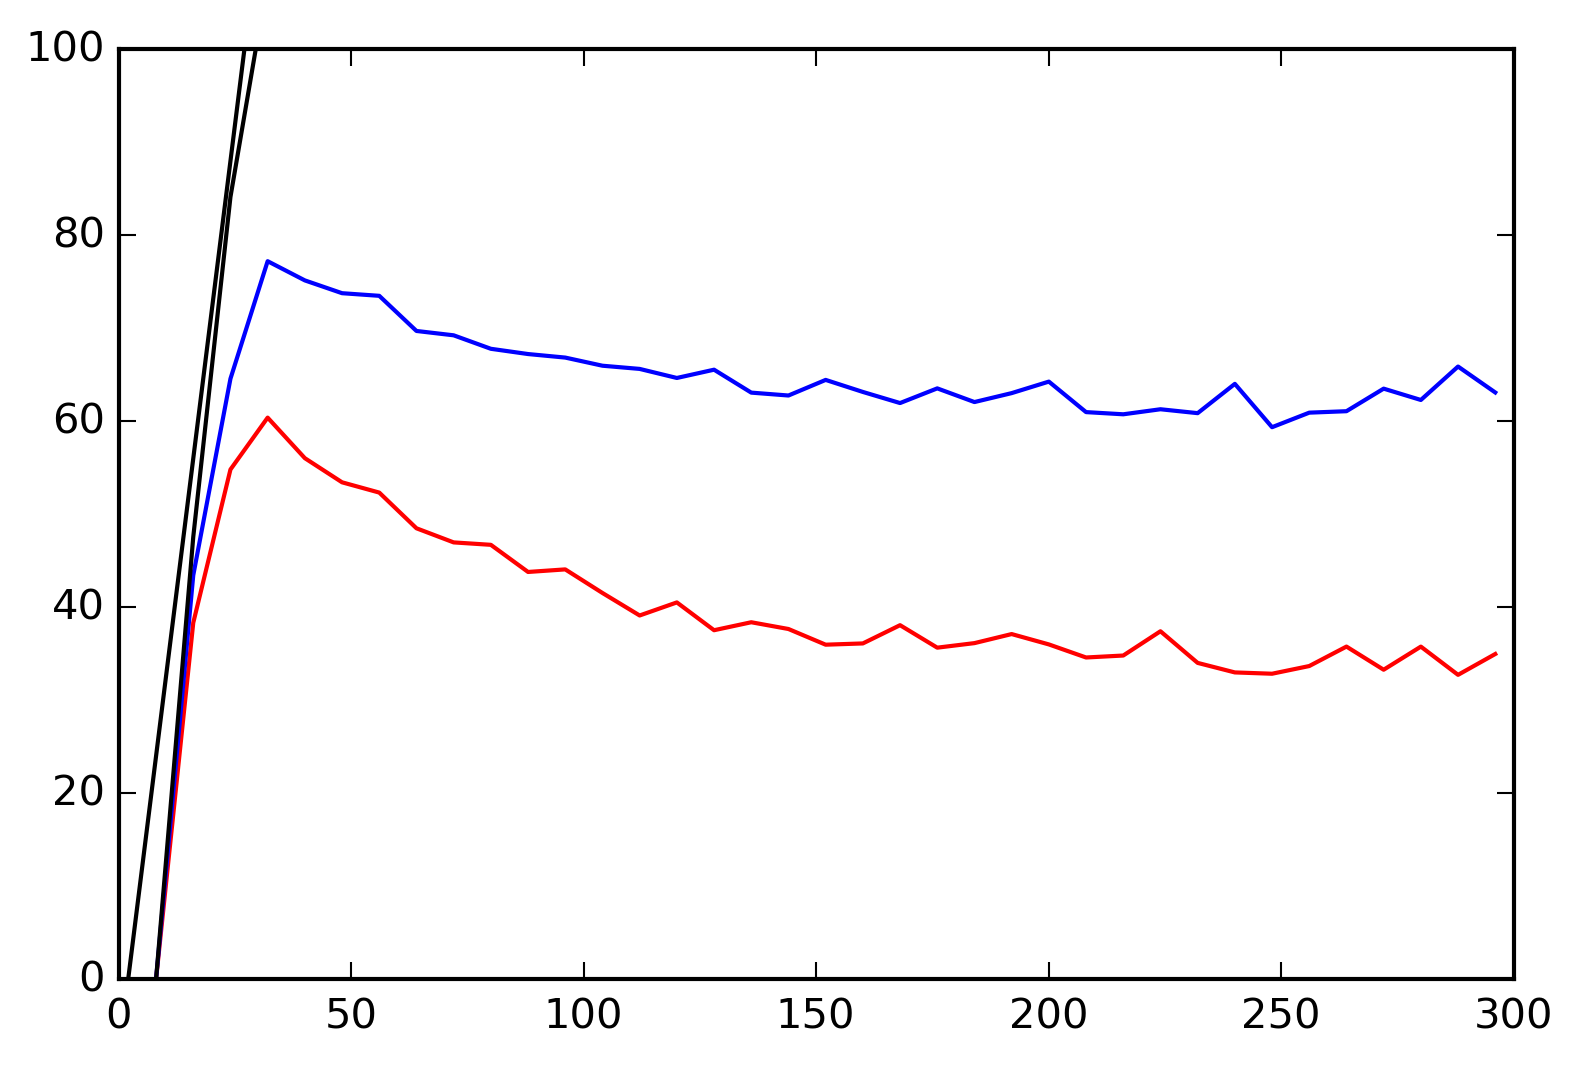

In [67]:
#LOG difference plot for record1/record2 ratio
#plt.plot(range(80), [np.exp(record1[i]-record2[i]) for i in range(80)], color='red')

#plot of total volumes available:
plt.plot(range(Nprot)[::8], record1[::8], color='red')
plt.plot(range(Nprot)[::8], record2[::8], color='blue')
plt.plot(range(Nprot)[::8], totalV[::8], color='black')

plt.plot(range(Nprot), [4*(i-2) for i in range(Nprot)], color='black') #1.3863

#plt.plot(range(Nprot), [np.log(np.sqrt(i))*i for i in range(Nprot)], color='black') 

#plt.plot(range(50), [record1[i]/1 for i in range(50)])
#plt.plot(np.arange(0,100)+2,np.arange(0,100)*2)
#plt.plot(range(80), [np.exp(record1[i])/10**i for i in range(80)])

#plt.xlim([0,50])
plt.ylim([0,100])
#plt.yscale('log')

### for a person of volume 90L, that yields about 100uL of explored volume -> this is form a log difference of 15units.
#note we are in natural log space

(16000, 10)


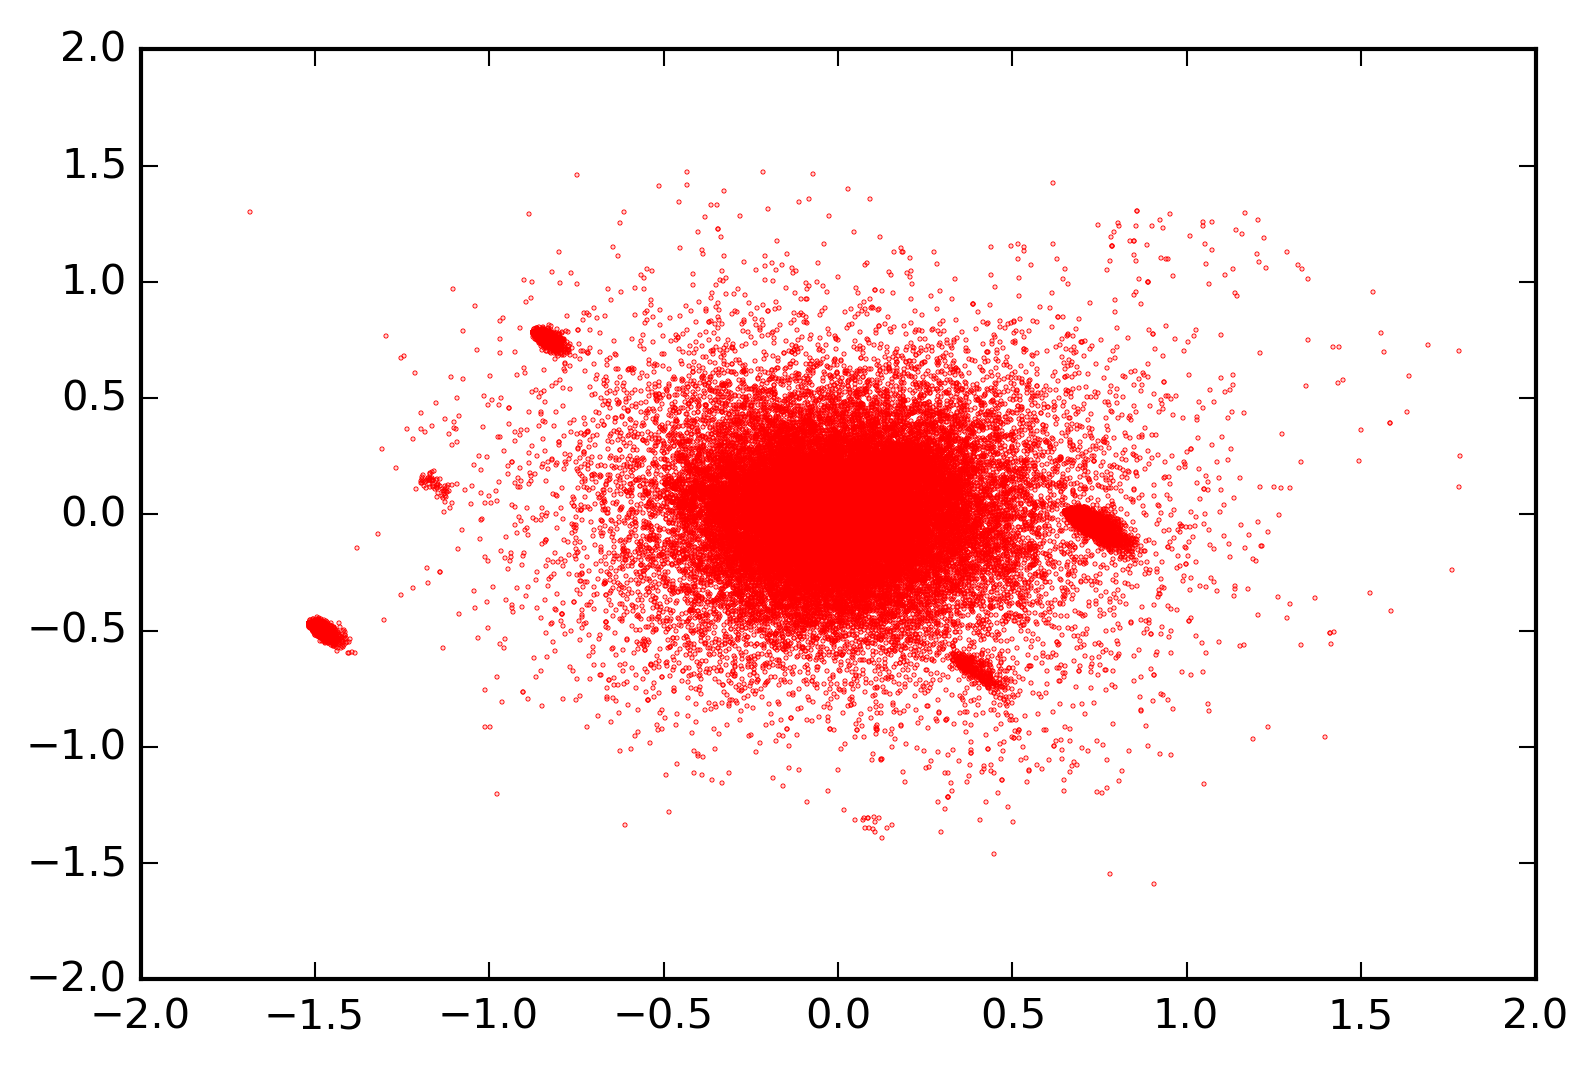

In [421]:
for i in [0,2,4,6,8,10,12,14]:
    plt.scatter(results.Y[8000:,i],results.Y[8000:,i+1], color='black',s=.05)
    plt.scatter(results.Y[:8000,i],results.Y[:8000,i+1], color='red',s=.05 )

(48000, 400)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # Remove the CWD from sys.path while we load stuff.


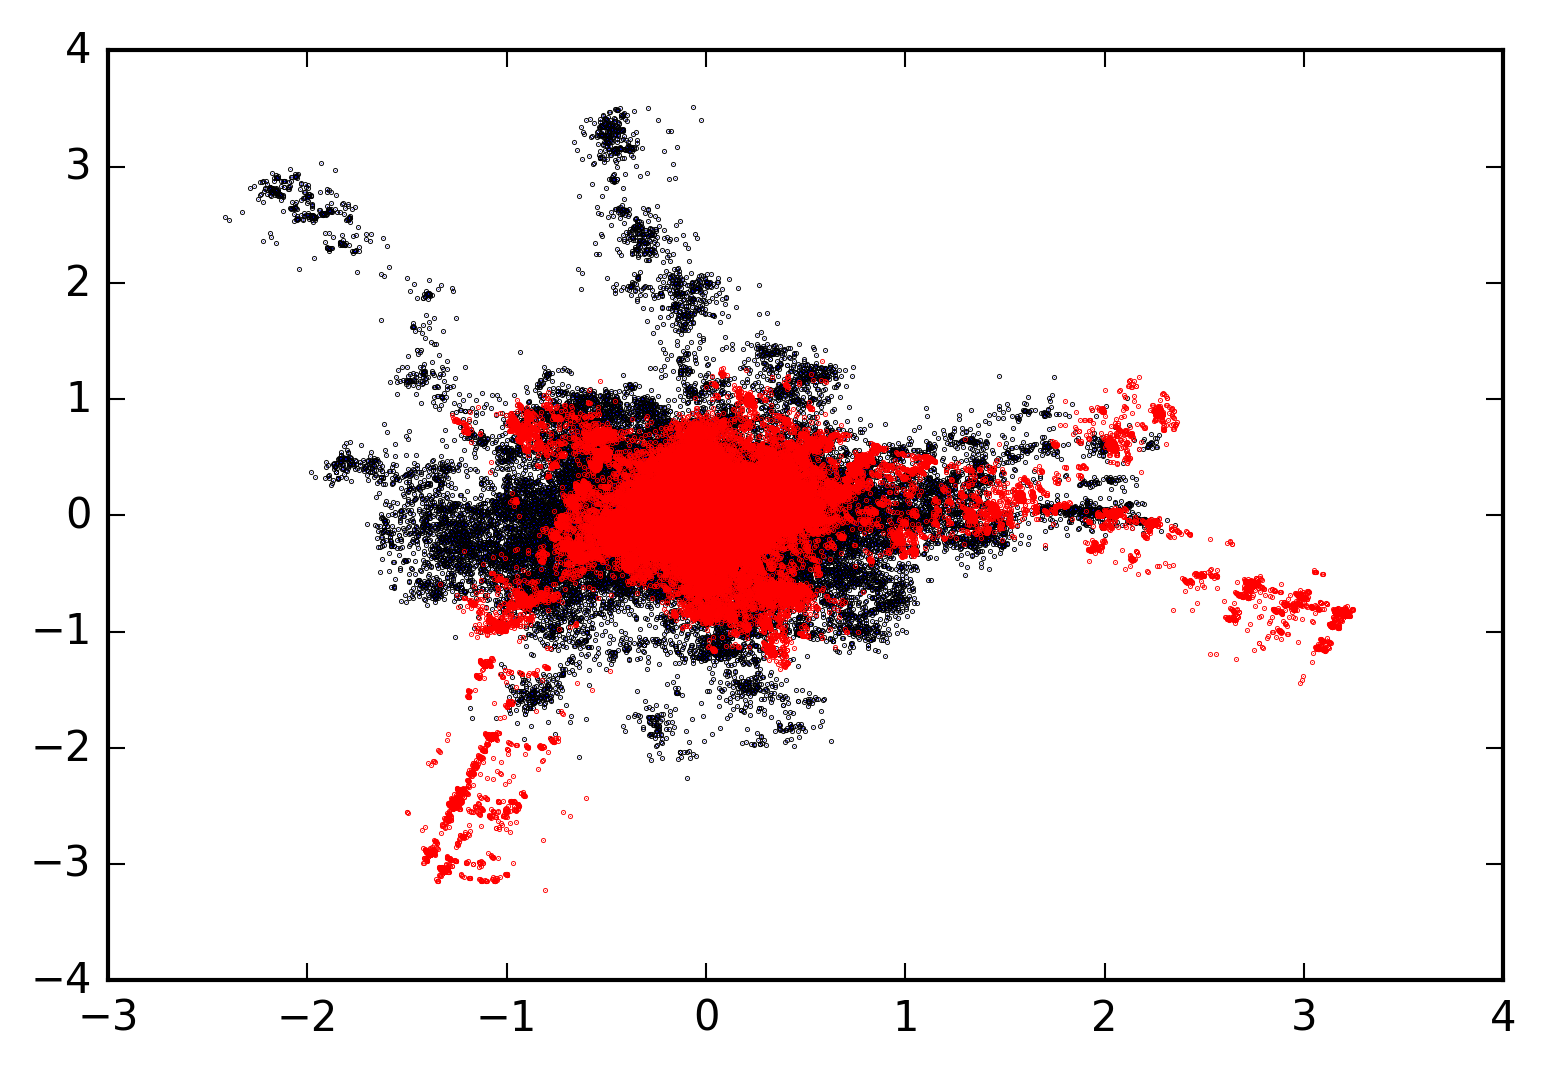

In [32]:
#results = PCA(M)
print(np.shape(results.Y))

xN=np.shape(results.Y)[0]

for i in [0,2,4,6,8,10,12,14, 16, 18, 20]:
    plt.scatter(results.Y[xN/2:,i], results.Y[xN/2:,i+1],s=.05)
    
for i in [0,2,4,6,8,10,12,14, 16, 18, 20]:    
    plt.scatter(results.Y[:xN/2,i], results.Y[:xN/2,i+1], color='red',s=.05)  


#plt.scatter(results.Y[xN/2:,10], results.Y[xN/2:,2],s=.05)
#plt.scatter(results.Y[:xN/2,10], results.Y[:xN/2,2], color='red',s=.05)
#####plt.scatter(results.Y[xN/2:,0], results.Y[xN/2:,1],s=.05)


In [14]:
from sklearn import manifold

In [4]:
manifold.Isomap(n_neighbors=5, n_components=2, eigen_solver='auto', 
                tol=0, max_iter=100, path_method='auto', neighbors_algorithm='auto', n_jobs=1)

Isomap(eigen_solver='auto', max_iter=100, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

In [20]:
#run both evolution scenarios

M1 = evolve_forward(Nbottle=1, Ngen=20, Npop=100, Rmut=2, Psize=50)
M2 = evolve_forward(Nbottle=20, Ngen=20, Npop=100, Rmut=2, Psize=50)
M = np.reshape([M1,M2],[np.shape(M1)[0]*2, np.shape(M1)[1]])

###subsample M
###sample size
#sizeN=1000
#sample1 = np.random.randint(len(M)/2, size=sizeN/2)
#sample2 = len(M)/2+np.random.randint(len(M)/2, size=sizeN/2)
#sample=np.array(np.reshape([sample1,sample2],[len(sample1)*2]),dtype='b')

#M = M[sample]


In [26]:
#Z = manifold.Isomap(n_neighbors=30, n_components=2, eigen_solver='auto', 
               # tol=0, max_iter=100, path_method='auto', neighbors_algorithm='auto', n_jobs=1).fit_transform(M)

Z = manifold.LocallyLinearEmbedding(n_neighbors=50, n_components=2, reg=0.001, eigen_solver='dense', 
                                      tol=1e-06, max_iter=100, method='standard', hessian_tol=0.0001, 
                                      modified_tol=1e-12, random_state=None, n_jobs=1).fit_transform(M)
#can use method='modified' for large N_components

print(np.shape(Z))
#Z = manifold.Isomap.fit(M,y=None)

(4000, 2)


In [30]:
Y=Z
xN=np.shape(Y)[0]

plt.scatter(Y[xN/2:,0], Y[xN/2:,1],s=1)

plt.scatter(Y[:xN/2,0], Y[:xN/2,1], color='red',s=1)

#plt.yscale('log')
#plt.xscale('log')

plt.savefig('temp')

#plt.scatter(Z[:500,0],Z[:500,1],color='red')
#plt.scatter(Z[500:,0],Z[500:,1])

NameError: name 'Z' is not defined

In [95]:
np.shape(results.Y>0)

(120000, 100)

In [98]:
model = manifold.TSNE(n_components=2, random_state=0, verbose=2)
Z = model.fit_transform(results.Y[np.arange(0,120000,50),:25])


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 25: error = 1.2166348, gradient norm = 0.0074997
[t-SNE] Iteration 50: error = 1.1047571, gradient norm = 0.0078028
[t-SNE] Iteration 75: error = 0.6372595, gradient norm = 0.0048630
[t-SNE] Iteration 100: error = 0.5537884, gradient norm = 0.0045172
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.553788
[t-SNE] Iteration 125: error = 0.4417316, gradient norm = 0.0035632
[t-SNE] Iteration 150: error = 0.4055528, gradient norm = 0.0034551
[t-SNE] Iteration 175: error = 0.3983891, gradient norm = 0.0039658
[t-SNE] Iteration 200: error = 0.3965756, gradient norm = 0.0037108
[t-SNE] Iteration 225: error = 0.4014702, gradient norm = 0.0036227
[t-SN

In [29]:
xN=np.shape(Z)[0]

plt.scatter(Z[xN/2:,0], Z[xN/2:,1],s=1)
plt.scatter(Z[:xN/2,0], Z[:xN/2,1], color='red',s=1)

NameError: name 'Z' is not defined

In [4]:
%load_ext rpy2.ipython
# We need ggplot2
# Load in the pandas library
import pandas as pd 

In [5]:
%R require(ggplot)
%R require(logisticPCA)

/usr/lib/python3/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: ggplot

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/lib/python3/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: logisticPCA

  res = super(Function, self).__call__(*new_args, **new_kwargs)


array([1], dtype=int32)

In [186]:
%R -i M
%R log_model = logisticPCA(M, k=100)

#options for log_model are mu-main effects; U-k-dm orthonormal loading matrix; PCs-PCA scores; 
%R print(log_model)

/usr/lib/python3/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Error in crossprod(eta) : Interrupted

  res = super(Function, self).__call__(*new_args, **new_kwargs)


KeyboardInterrupt: 

[ 0.16959088  0.10008725  0.04231324  0.01778412  0.015938    0.01526509
  0.01363942  0.01310175  0.01030088  0.00965682  0.00937426  0.0087973
  0.00865758  0.00857776  0.00830719  0.00777357  0.00738088  0.00735446
  0.00663888  0.00661171  0.00631794  0.00621738  0.00604332  0.00589796
  0.00577151  0.0054712   0.00543454  0.00521147  0.00504539  0.00495546
  0.00472151  0.00465468  0.00457076  0.00454669  0.00445089  0.00432281
  0.00427246  0.00423068  0.00412457  0.00405535]


1.0

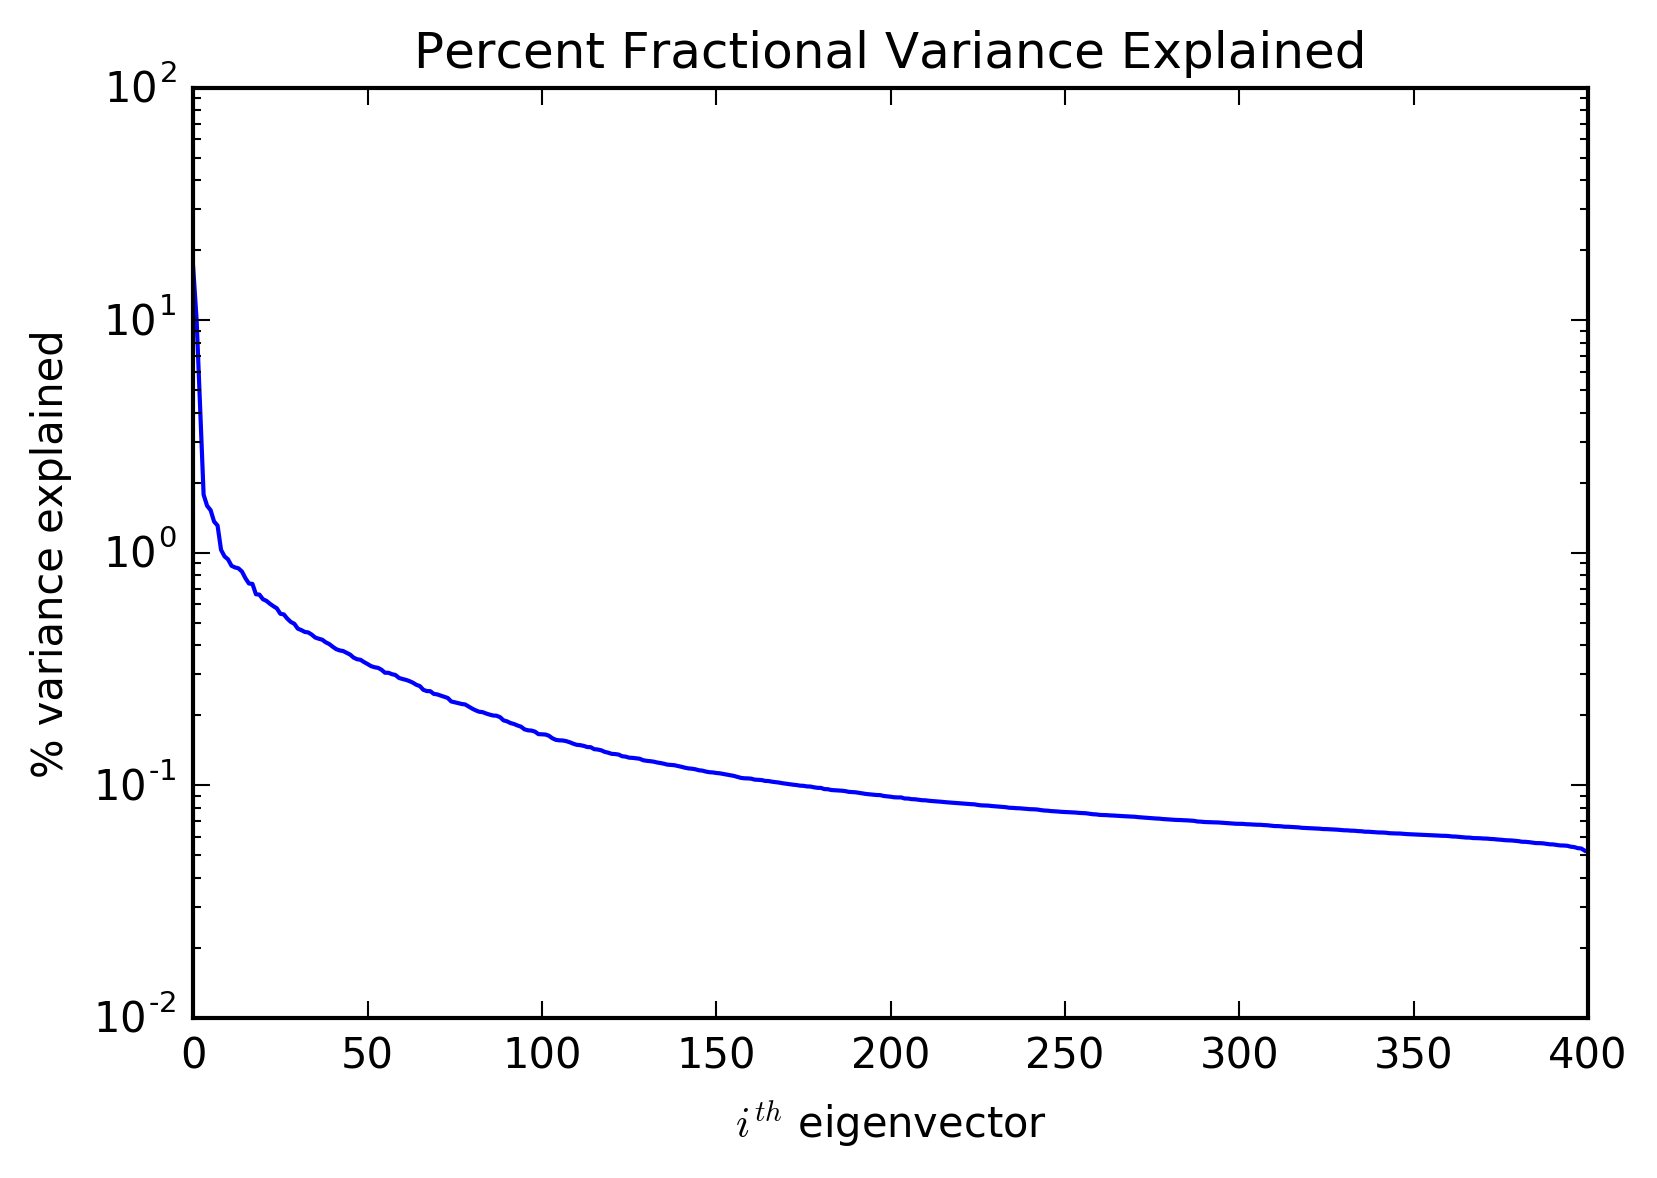

In [37]:
#%R print(log_model)
#%R print(log_model$mu)
#%R plot(log_model, type = 'trace')
print(results.fracs[:40])

plt.plot(range(len(results.fracs)), results.fracs*100)
plt.title('Percent Fractional Variance Explained')
plt.xlabel('$i^{th}$ eigenvector')
plt.ylabel('% variance explained')
plt.yscale('log')

np.sum(results.fracs)

In [152]:
%R x_PCs = log_model$PCs
#%R log_model$prop_deviance_expl
%R -o x_PCs
np.shape(x_PCs)
radial_plot(x_PCs, N=25, Npop=2, ONEcolor='black', TWOcolor='red')

(20000, 25)

In [38]:
np.max(np.abs(results.Y))

2.9985725665502274

ValueError: x and y must be the same size

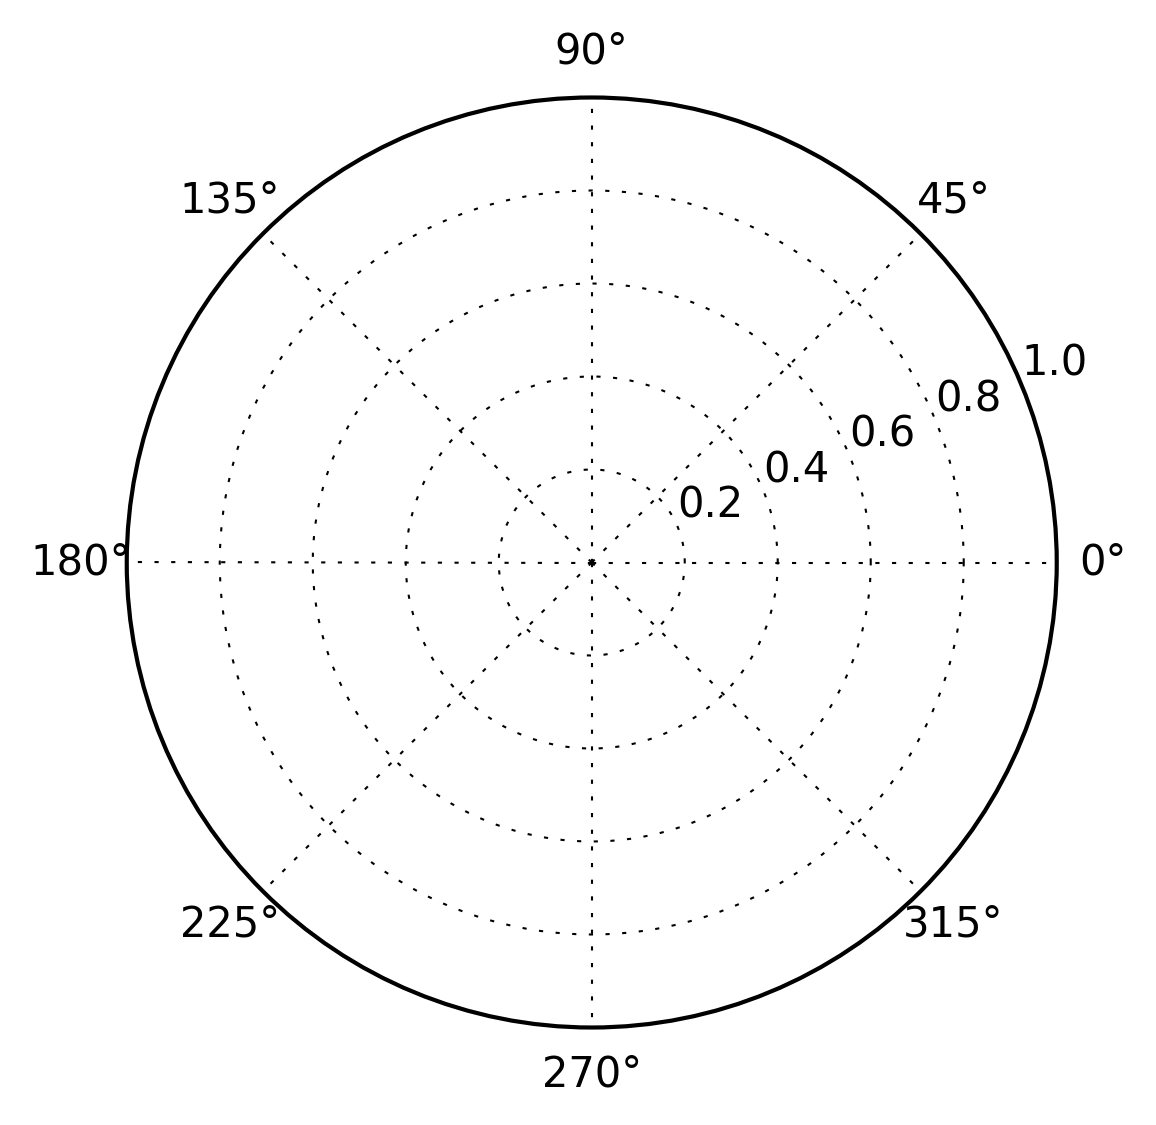

In [79]:
radial_plot(results.Y, N=1, Npop=2, ONEcolor='black', TWOcolor='red')

In [50]:
def radial_plot(PCA_M, N=3, Npop=2, ONEcolor='black', TWOcolor='red', neg_mode=False):
    #
    #PCA_M is a PCA matrix
    #N is number of components to plot
    #Npop is the number of distinct populations embedded in PCA_M (can be 1 or 2)
    #color of the first PCA value
    
    xN=np.shape(PCA_M)[0]
    
    theta=np.arange(0,np.pi,np.pi/N)
    thetaspread=np.arange(0,np.pi/N,np.pi/N/xN*2)
    
    #print(len(theta), len(thetaspread), xN, len(PCA_M[xN/2:,1]))
    
    ax = plt.subplot(111, projection='polar')
    #ax.set_ylim([-10,10])
    #ax = plt.subplot(111)
    
    for i in range(N): #,4,6,8,10,12,14,16,18]:
        #ax.scatter(results.Y[xN/2:,i]*np.cos(theta[i]+thetaspread), results.Y[xN/2:,i]*np.sin(theta[i]+thetaspread),s=.05, color='black')
        if neg_mode: ax.scatter(theta[i]+thetaspread+(PCA_M[xN/2:,i]<0)*np.pi, 
                                np.abs(PCA_M[xN/2:,i]),s=.05, color=ONEcolor)
            
        else: ax.scatter(theta[i]*2+thetaspread*2, 
                                np.abs(PCA_M[xN/2:,i]),s=.05, color=ONEcolor)
        #ax.scatter(theta[i]+thetaspread, np.abs(PCA_M[xN/2:,i]),s=.05, color=ONEcolor)
    
    if Npop==2: nextColor=TWOcolor
    else: nextColor=ONEcolor
        
    for i in range(N): #,4,6,8,10,12,14,16,18]:    
        #ax.scatter(results.Y[:xN/2,i]*np.cos(theta[i]+thetaspread), results.Y[:xN/2,i]*np.sin(theta[i]+thetaspread),s=.05, color='red')
            
        if neg_mode: ax.scatter(theta[i]+thetaspread+(PCA_M[:xN/2,i]<0)*np.pi, 
                                np.abs(PCA_M[:xN/2,i]),s=.05, color=nextColor)
            
        else: ax.scatter(theta[i]*2+thetaspread*2, 
                                np.abs(PCA_M[:xN/2,i]),s=.05, color=nextColor)
            
        #ax.scatter(theta[i]+thetaspread+(PCA_M[:xN/2,i]<0)*np.pi, np.abs(PCA_M[:xN/2,i]),s=.05, color=TWOcolor)
        #ax.scatter(theta[i]+thetaspread, np.abs(PCA_M[:xN/2,i]),s=.05, color=TWOcolor)
        pass

    else: pass
    #ax.scatter([0,0,0], [4,-9,-4])
    #ax.set_rmax(40)
    #ax.set_rticks([20,40])  # less radial ticks
    #ax.set_rlabel_position(-22.5)
    if neg_mode: ax.set_xticks(np.arange(0,2*np.pi,np.pi/N))
    else: ax.set_xticks(np.arange(0,2*np.pi,np.pi/N*2))
    
    ax.grid(linewidth=.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    return ax

In [85]:
def radial_plot(PCA_M, N=3, Npop=2, ONEcolor='black', TWOcolor='blue', neg_mode=False):
    #
    #PCA_M is a PCA matrix
    #N is number of components to plot
    #Npop is the number of distinct populations embedded in PCA_M (can be 1 or 2)
    #color of the first PCA value
    
    xN=np.shape(PCA_M)[0]
    # 
    theta=np.arange(0,np.pi,np.pi/int(N))
    thetaspread=np.arange(0,np.pi/int(N),np.pi/int(N)/int(xN)*2)
    
    #print(len(theta), len(thetaspread), xN, len(PCA_M[xN/2:,1]))
    
    ax = plt.subplot(111, projection='polar')
    #ax.set_ylim([-10,10])
    #ax = plt.subplot(111)
    
    for i in range(N): #,4,6,8,10,12,14,16,18]:
        #print('plotting element: ' + str(i))
        #ax.scatter(results.Y[xN/2:,i]*np.cos(theta[i]+thetaspread), results.Y[xN/2:,i]*np.sin(theta[i]+thetaspread),s=.05, color='black')
        if neg_mode: ax.scatter(theta[i]+thetaspread+(PCA_M[int(xN/2):,i]<0)*np.pi, 
                                np.abs(PCA_M[int(xN/2):,i]),s=.05, color=ONEcolor, marker='v')
            
        else: ax.scatter(theta[i]*2+thetaspread*2, 
                                np.abs(PCA_M[int(xN/2):,i]),s=.05, color=ONEcolor, marker='v')
        #ax.scatter(theta[i]+thetaspread, np.abs(PCA_M[xN/2:,i]),s=.05, color=ONEcolor)
    
    if Npop==2: nextColor=TWOcolor
    else: nextColor=ONEcolor
        
    for i in range(N): #,4,6,8,10,12,14,16,18]:    
        #ax.scatter(results.Y[:xN/2,i]*np.cos(theta[i]+thetaspread), results.Y[:xN/2,i]*np.sin(theta[i]+thetaspread),s=.05, color='red')
            
        if neg_mode: ax.scatter(theta[i]+thetaspread+(PCA_M[:int(xN/2),i]<0)*np.pi, 
                                np.abs(PCA_M[:int(xN/2),i]),s=.05, color=nextColor)
            
        else: ax.scatter(theta[i]*2+thetaspread*2, 
                                np.abs(PCA_M[:int(xN/2),i]),s=.05, color=nextColor, marker='v')
            
        #ax.scatter(theta[i]+thetaspread+(PCA_M[:xN/2,i]<0)*np.pi, np.abs(PCA_M[:xN/2,i]),s=.05, color=TWOcolor)
        #ax.scatter(theta[i]+thetaspread, np.abs(PCA_M[:xN/2,i]),s=.05, color=TWOcolor)
        pass

    else: pass
    #ax.scatter([0,0,0], [4,-9,-4])
    #ax.set_rmax(40)
    #ax.set_rticks([20,40])  # less radial ticks
    #ax.set_rlabel_position(-22.5)
    if neg_mode: ax.set_xticks(np.arange(0,2*np.pi,np.pi/N))
    else: ax.set_xticks(np.arange(0,2*np.pi,np.pi/N*2))
    
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(linewidth=.2, linestyle='dotted')
    return ax


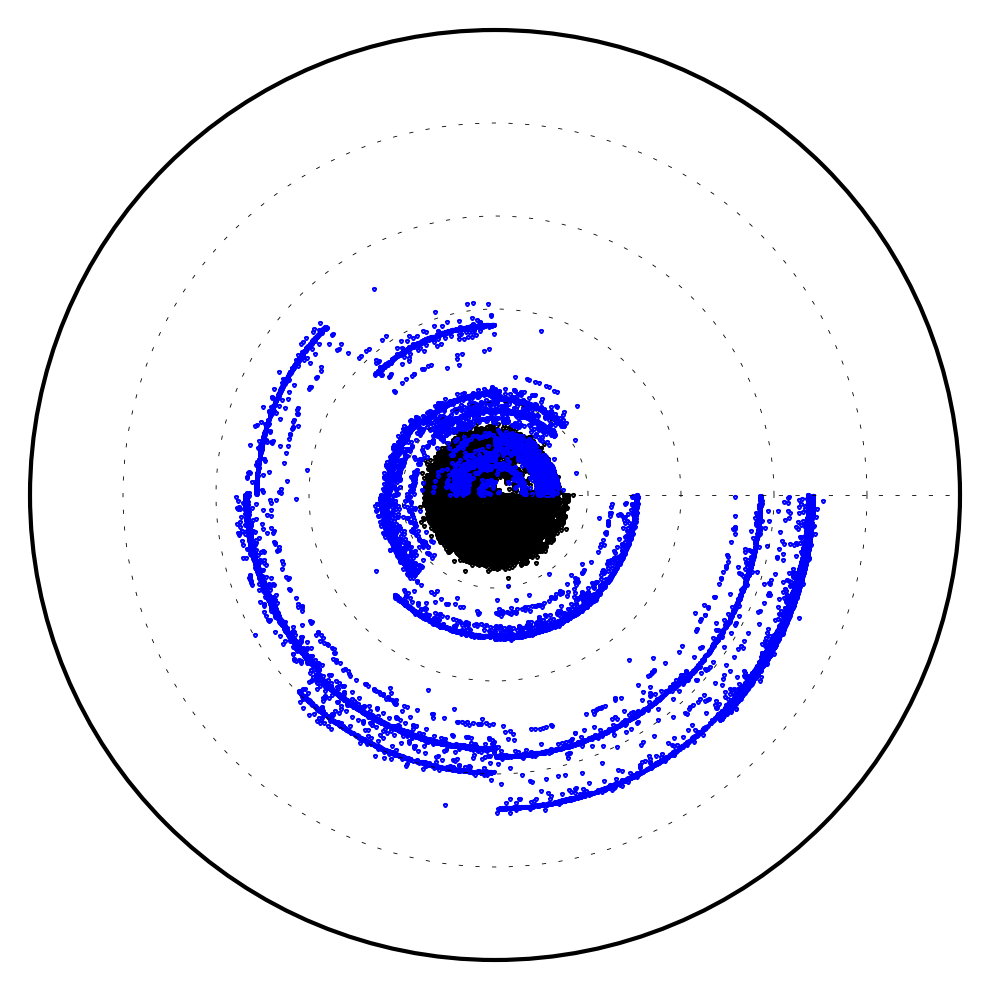

In [100]:
radial_plot(results.Y, N=1, Npop=2, ONEcolor='black', TWOcolor='blue')

In [94]:
def radial_plot(PCA_M, N=3, Npop=2, ONEcolor='black', TWOcolor='blue', neg_mode=False):
    #
    #PCA_M is a PCA matrix
    #N is number of components to plot
    #Npop is the number of distinct populations embedded in PCA_M (can be 1 or 2)
    #color of the first PCA value
    
    xN=np.shape(PCA_M)[0]
    
    theta=np.arange(0,np.pi,np.pi/N)
    thetaspread=np.arange(0,np.pi/N,np.pi/N/xN*2)
    
    #print(len(theta), len(thetaspread), xN, len(PCA_M[xN/2:,1]))
    
    ax = plt.subplot(111, projection='polar')
    #ax.set_ylim([-10,10])
    #ax = plt.subplot(111)
    
    for i in range(N): #,4,6,8,10,12,14,16,18]:
        #ax.scatter(results.Y[xN/2:,i]*np.cos(theta[i]+thetaspread), results.Y[xN/2:,i]*np.sin(theta[i]+thetaspread),s=.05, color='black')
        if neg_mode: ax.scatter(theta[i]+thetaspread+(PCA_M[int(xN/2):,i]<0)*np.pi, 
                                np.abs(PCA_M[int(xN/2):,i]),s=.05, color=ONEcolor, marker='v')
            
        else: ax.scatter(theta[i]*2+thetaspread*2, 
                                np.abs(PCA_M[int(xN/2):,i]),s=.05, color=ONEcolor, marker='v')
        #ax.scatter(theta[i]+thetaspread, np.abs(PCA_M[xN/2:,i]),s=.05, color=ONEcolor)
    
    if Npop==2: nextColor=TWOcolor
    else: nextColor=ONEcolor
        
    for i in range(N): #,4,6,8,10,12,14,16,18]:    
        #ax.scatter(results.Y[:xN/2,i]*np.cos(theta[i]+thetaspread), results.Y[:xN/2,i]*np.sin(theta[i]+thetaspread),s=.05, color='red')
            
        if neg_mode: ax.scatter(theta[i]+thetaspread+(PCA_M[:int(xN/2),i]<0)*np.pi, 
                                np.abs(PCA_M[:int(xN/2),i]),s=.05, color=nextColor, marker='v')
            
        else: ax.scatter(theta[i]*2+thetaspread*2, 
                                np.abs(PCA_M[:int(xN/2),i]),s=.05, color=nextColor, marker='v')
            
        #ax.scatter(theta[i]+thetaspread+(PCA_M[:xN/2,i]<0)*np.pi, np.abs(PCA_M[:xN/2,i]),s=.05, color=TWOcolor)
        #ax.scatter(theta[i]+thetaspread, np.abs(PCA_M[:xN/2,i]),s=.05, color=TWOcolor)
        pass

    else: pass
    #ax.scatter([0,0,0], [4,-9,-4])
    #ax.set_rmax(40)
    #ax.set_rticks([20,40])  # less radial ticks
    #ax.set_rlabel_position(-22.5)
    if neg_mode: ax.set_xticks(np.arange(0,2*np.pi,np.pi/N))
    else: ax.set_xticks(np.arange(0,2*np.pi,np.pi/N*2))
    
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(linewidth=.2, linestyle='dotted')
    return ax

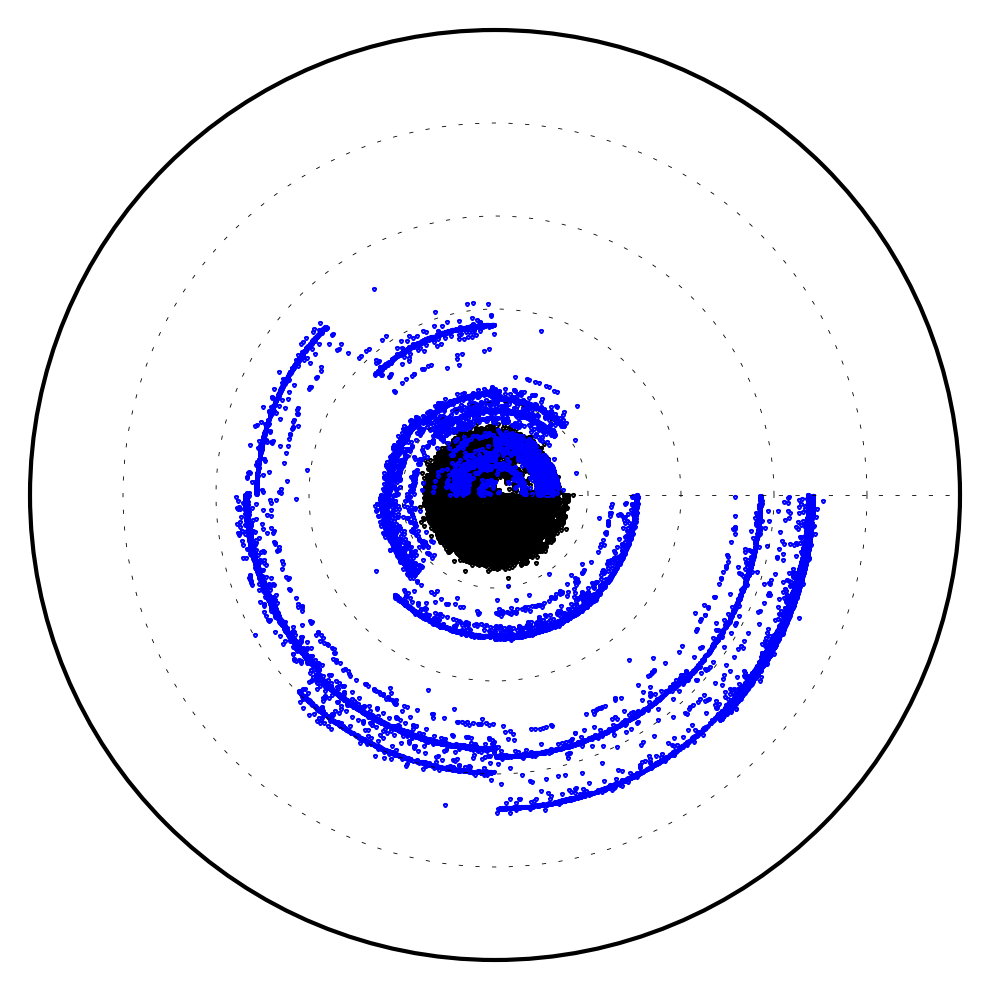

In [102]:
radial_plot(results.Y, N=1, Npop=2, ONEcolor='black', TWOcolor='blue')

making radial plots: 1


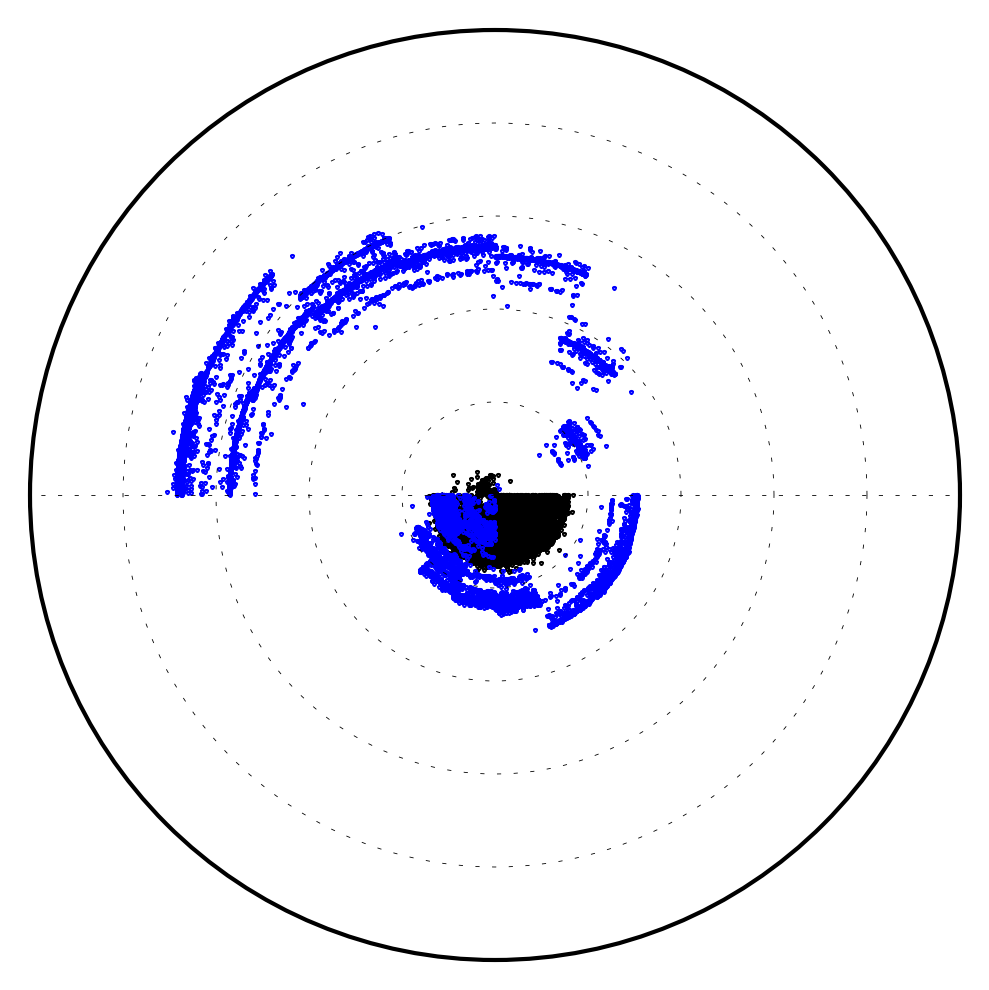

In [96]:
for i in [1]:
    print('making radial plots: ' + str(i))
    ax = radial_plot(results.Y, N=i, Npop=2, neg_mode='False')
    #
    #plotname = base + 'radialPcomponents.' + str(i) + '.png'
    #plt.rcParams['savefig.dpi'] = 100
    plt.show()
    #plt.savefig(plotname)
    #plt.close()


The following code is for IMPORTING discrete points and graphing them in order to visualize what the PCA space looks like in terms of 'nearness' of points in the original space of one-hot vectors.

In [4]:

def plot_boxes(X, y_pos=0, width=1, height=1, color='green'):
    #a few parameters to set
    #
    scaling = 1
    blackS = .3
    #
    #####################
    y = np.zeros(len(X[0]))
    #
    #subtract of each X[i] to determine where there is identity of mutations...
    for x in X: y = y - x
    #
    #reset values where there is no identity to 1
    y[y!=0]=1
    
    for i in range(len(X)): plt.plot(np.arange(len(y)), X[i]+i, linewidth=.8*scaling, color='orange')
    
    for i in range(len(X)): plt.plot([0,len(y)], [i,i], linewidth=blackS*scaling, color='black', zorder=10)
        
    plt.plot(np.arange(len(y)), y*(1+i), linewidth=1.2*scaling, color=color)
    
    #plot black bars
    plt.plot([0,len(y)], [i+1, i+1], linewidth=blackS*scaling, color='black', zorder=10)
    plt.plot([0,len(y)], [0, 0], linewidth=blackS*scaling, color='black', zorder=10)
    plt.plot([0,0], [0,i+1], linewidth=blackS*scaling, color='black', zorder=10)
    plt.plot([len(y), len(y)], [0,i+1], linewidth=blackS*scaling, color='black', zorder=10)
    
    




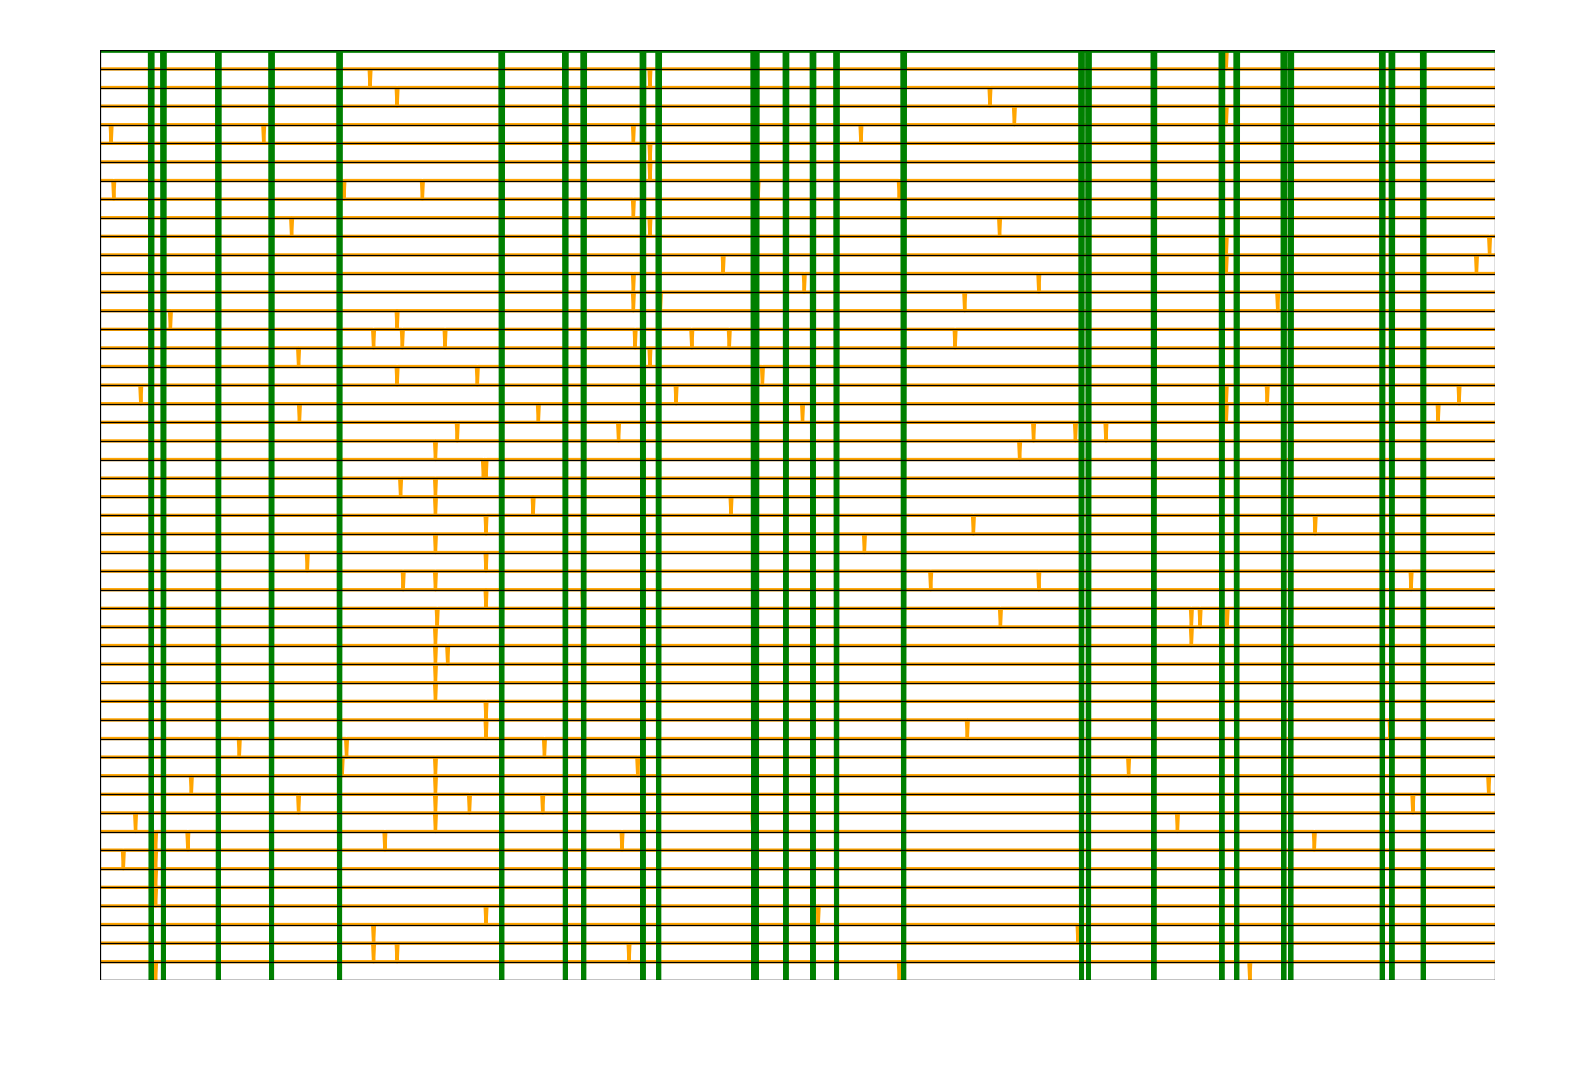

In [30]:
filename = 'Nb1.4_Nb2.10_Npop.50000_Ngen.8_Rmut.2_Psize.1600_comp.300_MmatrixLast200K.npy.tops.npy'
X = np.load(filename)

fig, ax = plt.subplots(figsize=(6,4))

plt.axis('off')
plot_boxes(X[1,:])

In [46]:
np.shape(X)

(6, 50, 1600)

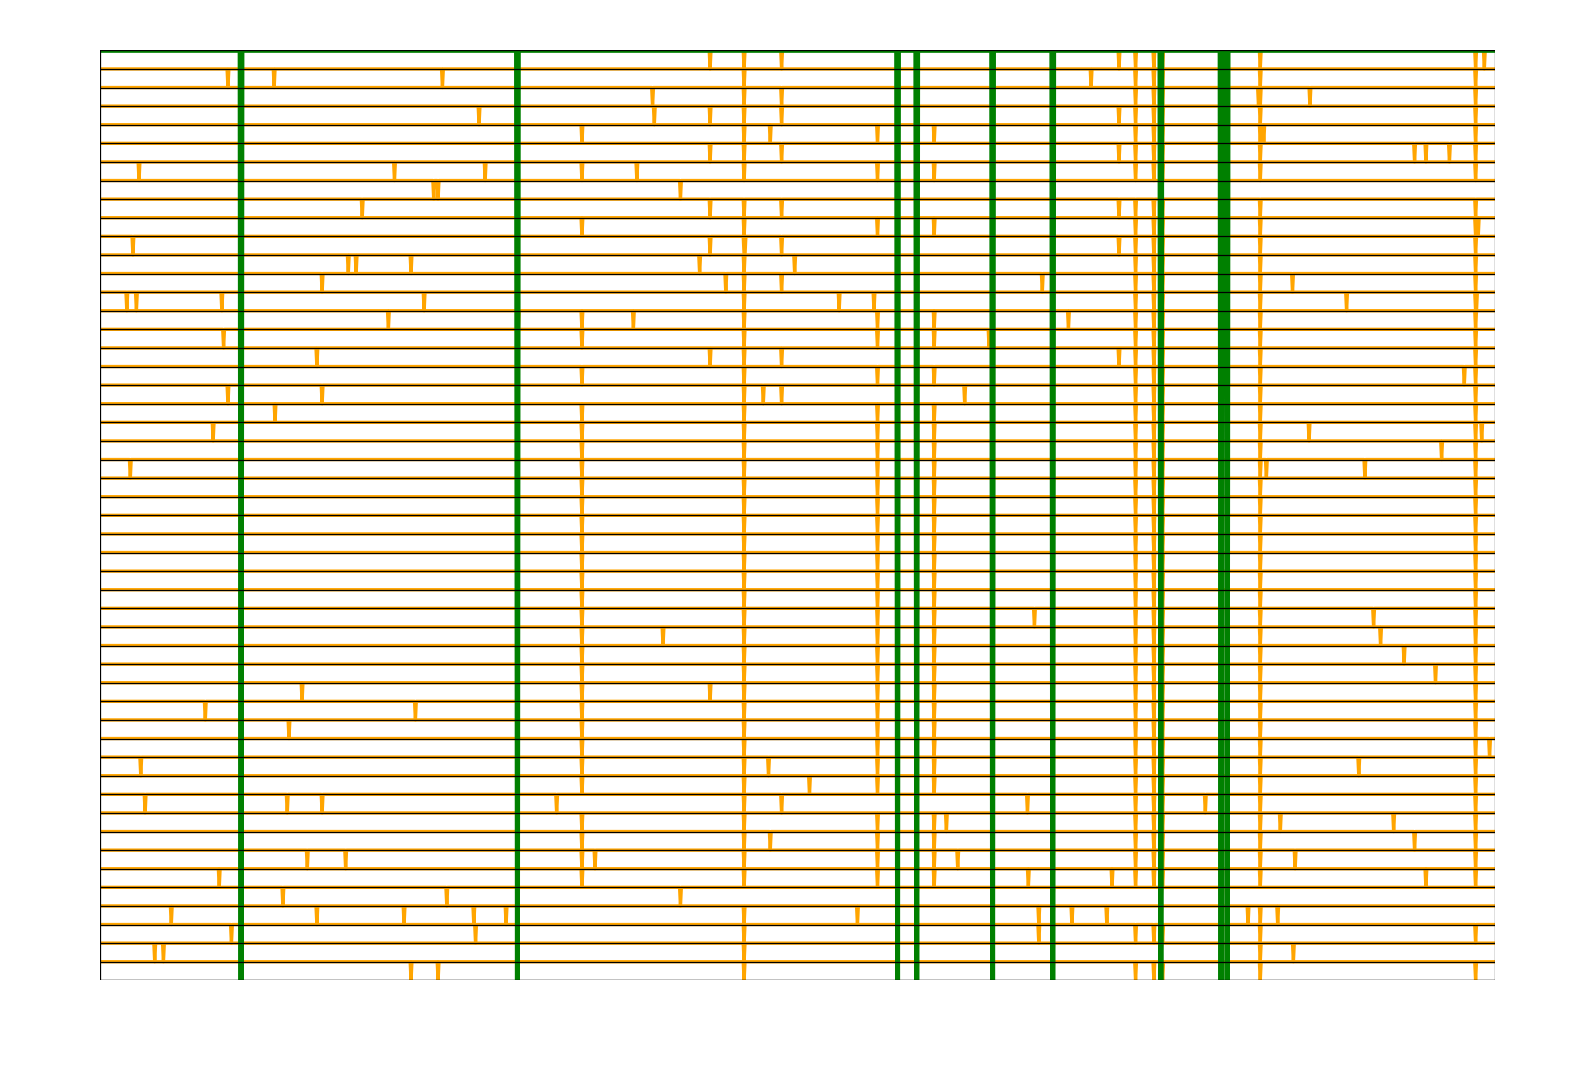

In [69]:
filename = 'Nb1.4_Nb2.1000_Npop.50000_Ngen.8_Rmut.2_Psize.1600_comp.300_MmatrixLast200K.npy.tops.npy'
X = np.load(filename)

fig, ax = plt.subplots(figsize=(6,4))

plt.axis('off')
plot_boxes(X[5,:])
#plot_boxes(X[4,:10])

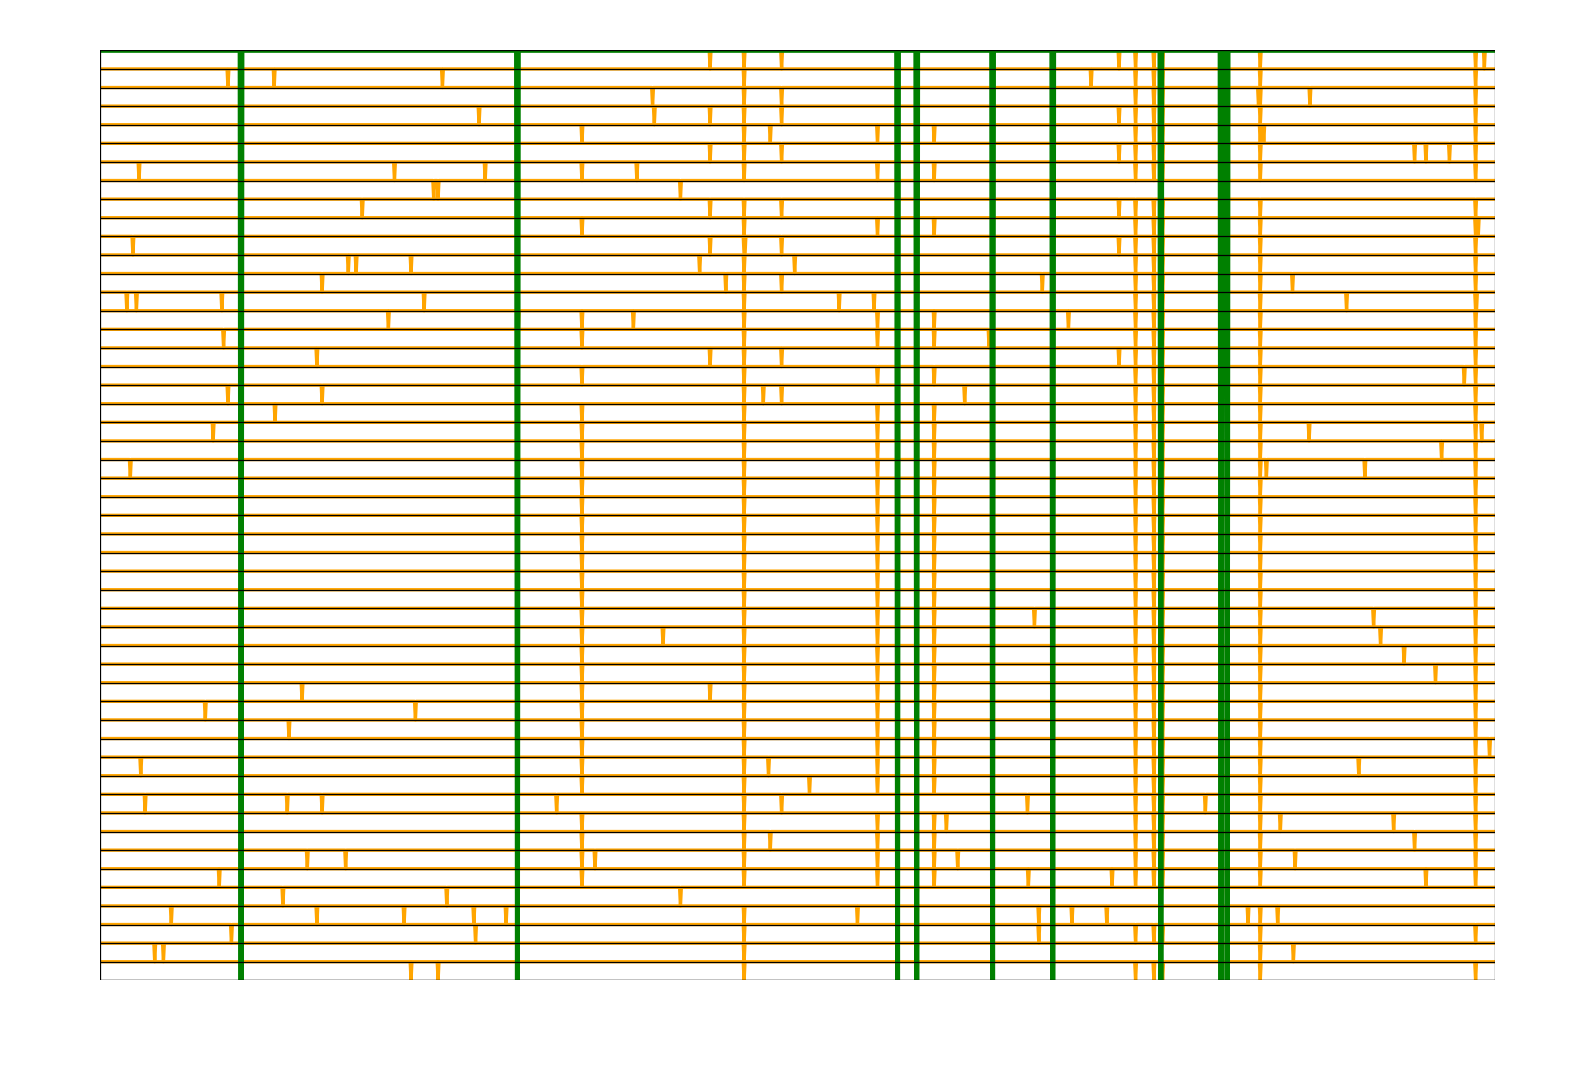

In [67]:
fig, ax = plt.subplots(figsize=(6,4))

plt.axis('off')
plot_boxes(X[5,:])

array([-2., -2., -2., ..., -2., -2., -2.])

In [ ]:
filenamePCA = 'Nb1.4_Nb2.10_Npop.50000_Ngen.8_Rmut.2_Psize.1600_comp.300_PCAmatrix.npy'
PCA = np.load(filenamePCA)

indices=np.zeros(20)

def pull_index(PCA, numb=10, comp=0):
    x=np.zeros(numb)
    
    for i in range(numb):
        val = np.argmax(np.abs(PCA[:,comp]))
        print('component: ' + str(comp) + str('/t\twith value: ') + str(val))
        x[i]= val
        PCA[val,comp] = 0
        
    return x
    
x0 = pull_index(PCA, numb=50, comp=0)
x1 = pull_index(PCA, numb=50, comp=5)
x2 = pull_index(PCA, numb=50, comp=10)
x3 = pull_index(PCA, numb=50, comp=25)

print('X0 components = ' + str(x0))
print('X5 components = ' + str(x1))
print('X10 components = ' + str(x2))
print('X25 components = ' + str(x3))

filename='Nb1.4_Nb2.10_Npop.50000_Ngen.8_Rmut.2_Psize.1600_comp.300_MmatrixLast200K.npy'

x = np.load(filename)
sequences=np.zeroes([4, 50, 1600])

for i, xs in enumerate [x0, x1, x2, x3]:
    targets = xs - 200000
    sequences[i] = x[xs, :]


np.save(filename+'.tops.npy', sequences)
